<a href="https://colab.research.google.com/github/dylpicklesTU26/dylanmurray/blob/main/Murray_Patri_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dylan Murray and Maya Patri

Exploring Lyme Disease Trends  
[View this project on GitHub.io](https://github.com/mayapatri/mayapatri.github.io/tree/main)

**Project Overview – Exploring Lyme Disease Trends in the U.S.**

This project analyzes historical Lyme disease incidence across U.S. counties using publicly available CDC datasets, focusing on trends from 1992 to 2011. Lyme disease, a bacterial infection transmitted by ticks, is among the most prevalent vector-borne illnesses in North America. Its symptoms can range from mild fatigue and fever to severe long-term complications, making early detection and prevention critical.

In **Milestone 1**, we visualized trends in disease incidence by state and year range to identify high-risk regions and time periods with notable increases in reported cases.

In **Milestone 2**, we expanded our analysis by integrating county-level climate data. Specifically, we examined whether temperature patterns—particularly average annual temperatures—correlate with Lyme disease incidence. After merging the datasets by State, County, and YearRange, we used exploratory visualizations and linear regression to evaluate possible associations.

Our regression analysis revealed a statistically significant but modest negative correlation between temperature and reported Lyme cases. This suggests that colder regions may see more Lyme disease activity, possibly due to environmental conditions favoring tick habitats or host behaviors. While temperature alone is not a strong predictor, it may contribute to broader patterns when combined with ecological and behavioral variables in future models.


**Research Questions:**

How has Lyme disease incidence changed across U.S. counties from 1992–2011?

Which states and regions show the highest incidence rates or the steepest increases?

Does average temperature correlate with Lyme disease cases at the county level?

**Data Sourcing**

Lyme disease case data comes from the CDC – Lyme Disease Data and Surveillance (https://www.cdc.gov/lyme/data-research/facts-stats/index.html)

Temperature data comes from NOAA’s National Centers for Environmental Information (NCEI) (https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/county/mapping/110/tavg/199603/60/value)

Our initial dataset for Lyme rates contained missing values (NaN) for Lyme incidence in some states, which required imputation before analysis and for temperature was aggregated and cleaned by year range for each county in the U.S.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Merged shape: (12244, 5)


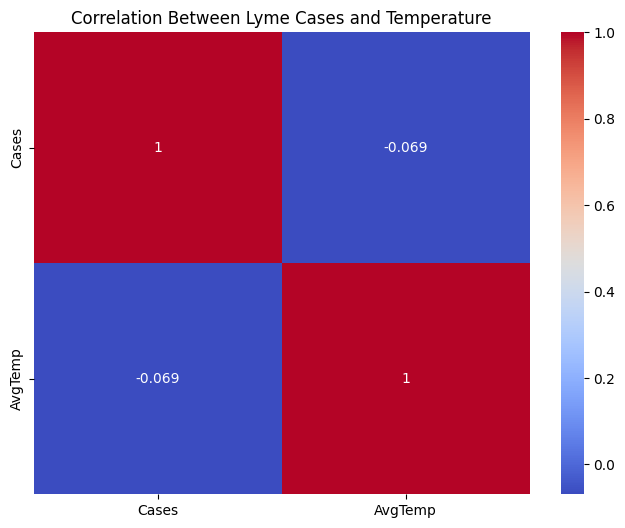

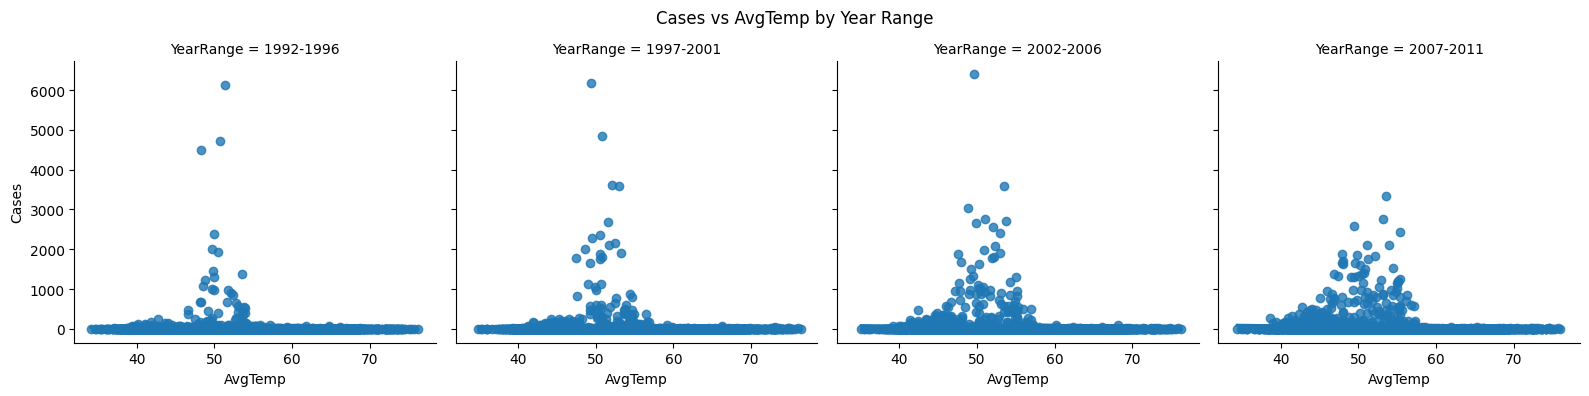

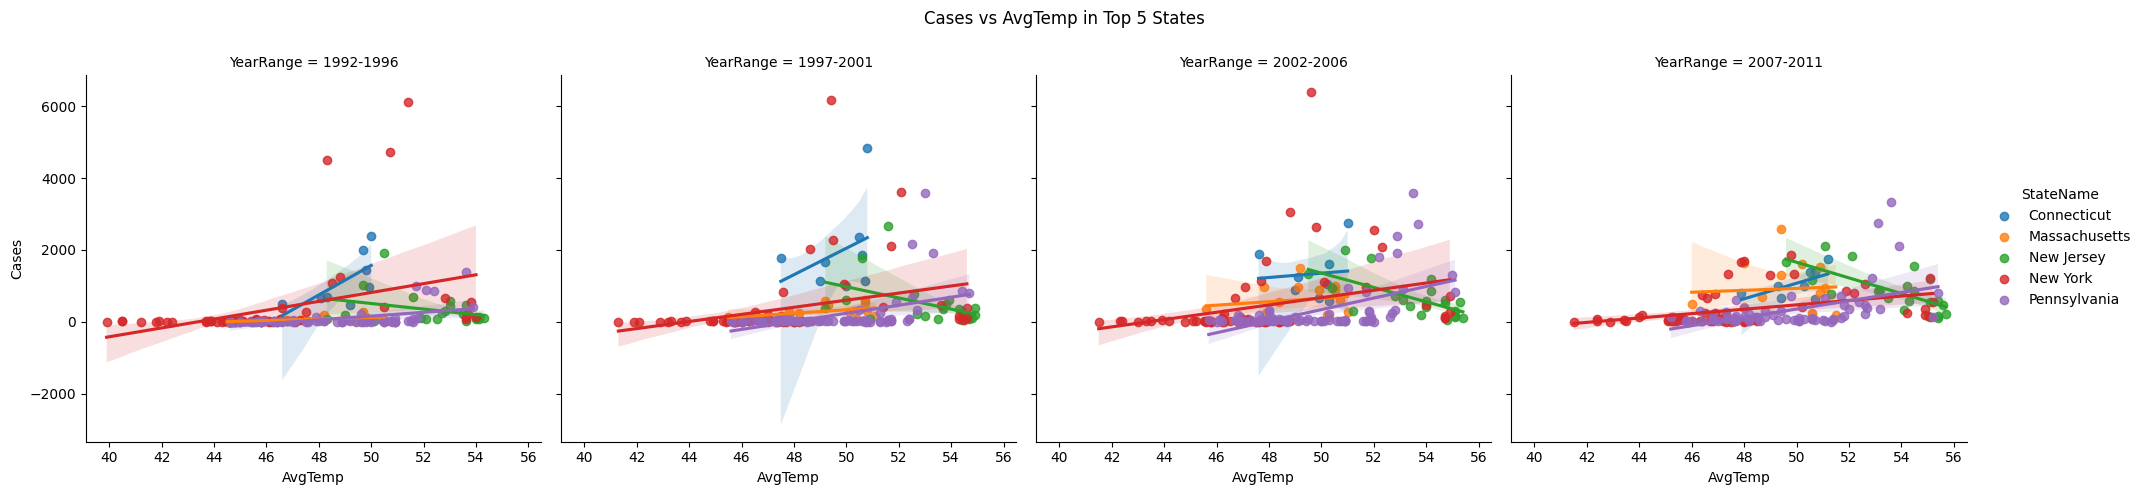

                            OLS Regression Results                            
Dep. Variable:                  Cases   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     58.60
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           2.07e-14
Time:                        03:44:18   Log-Likelihood:                -82863.
No. Observations:               12244   AIC:                         1.657e+05
Df Residuals:                   12242   BIC:                         1.657e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.1153     12.838      9.901      0.0

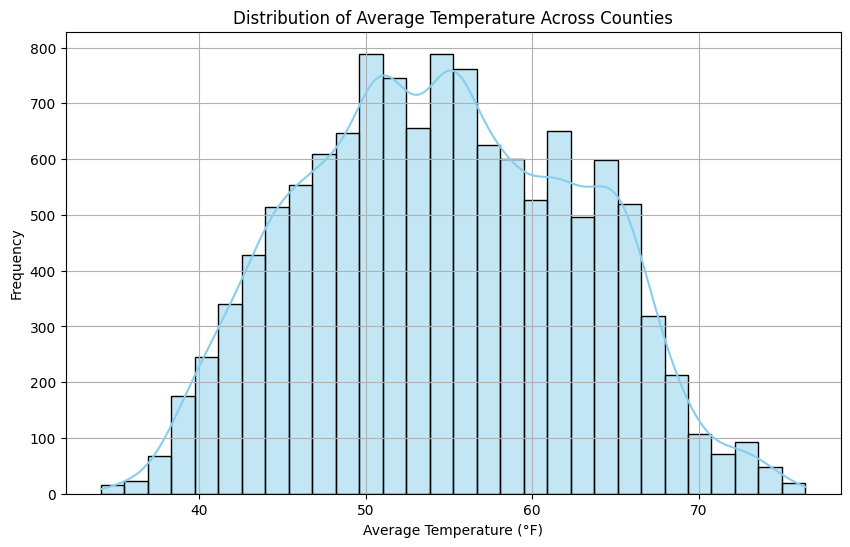

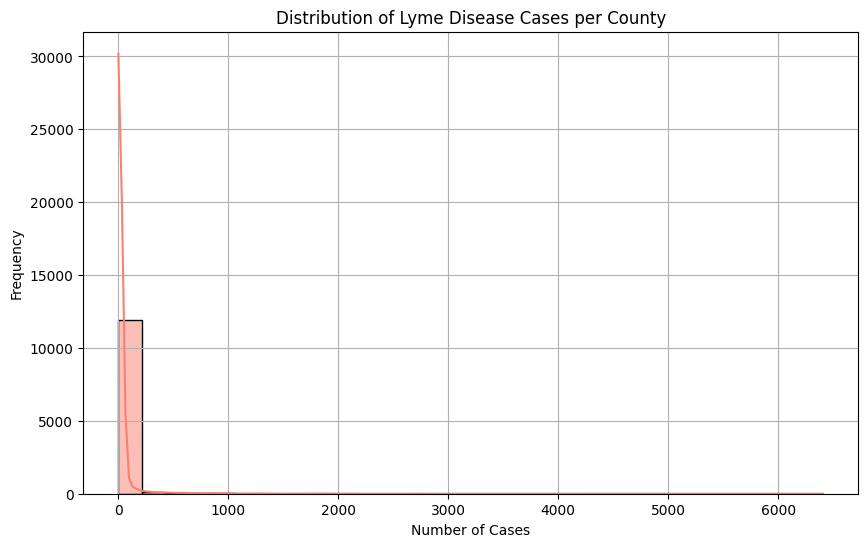

<ipython-input-16-38605c3a0271>:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged, x='TempQuartile', y='Cases', palette='YlGnBu')


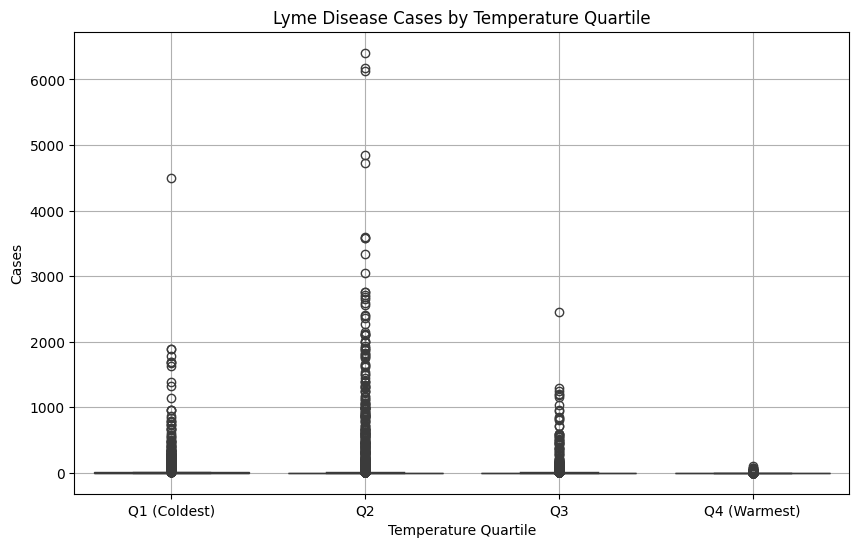

Top 5 States: Strongest Positive Relationship Between Temp and Cases
            State       Slope       P-Value  R-squared
5     Connecticut  270.382689  4.743274e-02   0.124688
35   Pennsylvania  113.329355  4.658127e-17   0.233129
29       New York   94.064189  1.539095e-07   0.106112
26  New Hampshire   75.530009  3.379967e-03   0.204664
18  Massachusetts   75.332004  6.965019e-02   0.059659

Top 5 States: Strongest Negative Relationship Between Temp and Cases
           State       Slope       P-Value  R-squared
36  Rhode Island -126.128066  3.831451e-01   0.042510
27    New Jersey -117.970748  4.123739e-04   0.141918
6       Delaware  -46.130149  8.608422e-01   0.003225
46     Wisconsin   -2.827263  2.512149e-01   0.004601
10      Illinois   -1.317484  1.275093e-07   0.066498


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load datasets
lyme_df = pd.read_csv("/content/drive/MyDrive/DataScienceProject/LymeDisease_9211_county.csv")
temp_df = pd.read_csv("/content/drive/MyDrive/DataScienceProject/Cleaned_Temperature_Dataset.csv")

# Rename and clean Lyme data
lyme_df.rename(columns={
    'ConfirmedCount_1992_1996': 'Lyme Cases 1992-1996',
    'ConfirmedCount_1997_2001': 'Lyme Cases 1997-2001',
    'ConfirmedCount_2002_2006': 'Lyme Cases 2002-2006',
    'ConfirmedCount_2007_2011': 'Lyme Cases 2007-2011'
}, inplace=True)

lyme_df.fillna(0, inplace=True)

lyme_df['StateName'] = lyme_df['StateName'].astype(str)
lyme_df['CountyName'] = lyme_df['CountyName'].astype(str)

for col in ['Lyme Cases 1992-1996', 'Lyme Cases 1997-2001', 'Lyme Cases 2002-2006', 'Lyme Cases 2007-2011']:
    lyme_df[col] = lyme_df[col].astype(int)

# Reshape Lyme data to long format
lyme_long = lyme_df.melt(
    id_vars=['StateName', 'CountyName'],
    value_vars=[
        'Lyme Cases 1992-1996',
        'Lyme Cases 1997-2001',
        'Lyme Cases 2002-2006',
        'Lyme Cases 2007-2011'
    ],
    var_name='YearRange',
    value_name='Cases'
)

lyme_long['YearRange'] = lyme_long['YearRange'].str.extract(r'Lyme Cases (.*)')

# TEST 0
#print("Temp DF columns before renaming:", temp_df.columns)

# Rename the columns
temp_df.rename(columns={'Temp': 'AvgTemp'}, inplace=True)
temp_df.rename(columns={'State': 'StateName', 'County': 'CountyName'}, inplace=True)

# TEST 1
#print(temp_df.columns)
#print(lyme_long.columns)

# Standardize YearRange values in temp_df
temp_df['YearRange'] = temp_df['YearRange'].str.replace('Lyme Cases ', '', regex=False)

# TEST 1.A
#print("\nAfter renaming, columns in temp_df:", temp_df.columns)
#print("Example YearRange values in lyme_long:", lyme_long['YearRange'].unique())
#print("Example YearRange values in temp_df:", temp_df['YearRange'].unique())

# Merge datasets
merged = pd.merge(lyme_long, temp_df, on=['StateName', 'CountyName', 'YearRange'], how='inner')
print("\nMerged shape:", merged.shape)

# The Visual Stuff Now

# Correlation heatmap
if not merged.empty:
    plt.figure(figsize=(8,6))
    #CHANGED THIS ONE
    #HEATMAP
    sns.heatmap(merged[['Cases', 'AvgTemp']].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Between Lyme Cases and Temperature')
    plt.show()

    # SCATTER BY TIME
    sns.lmplot(data=merged, x='AvgTemp', y='Cases', col='YearRange', height=4, aspect=1)
    plt.subplots_adjust(top=0.85)
    plt.suptitle('Cases vs AvgTemp by Year Range')
    plt.show()

    # TOP 5 STATES
    top_states = merged.groupby('StateName')['Cases'].sum().nlargest(5).index.tolist()
    top_merged = merged[merged['StateName'].isin(top_states)]

    sns.lmplot(data=top_merged, x='AvgTemp', y='Cases', hue='StateName', col='YearRange', height=5, aspect=1)
    plt.subplots_adjust(top=0.85)
    plt.suptitle('Cases vs AvgTemp in Top 5 States')
    plt.show()

    # LINEAR REGRESSION
    X = sm.add_constant(merged[['AvgTemp']])
    y = merged['Cases']
    model = sm.OLS(y, X).fit()
    print(model.summary())

    # Histogram of Average Temperature
    plt.figure(figsize=(10,6))
    sns.histplot(data=merged, x='AvgTemp', bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Average Temperature Across Counties')
    plt.xlabel('Average Temperature (°F)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

  # HISTOGRAM
    plt.figure(figsize=(10,6))
    sns.histplot(data=merged, x='Cases', bins=30, kde=True, color='salmon')
    plt.title('Distribution of Lyme Disease Cases per County')
    plt.xlabel('Number of Cases')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # BOXPLOT
    merged['TempQuartile'] = pd.qcut(merged['AvgTemp'], q=4, labels=['Q1 (Coldest)', 'Q2', 'Q3', 'Q4 (Warmest)'])

    plt.figure(figsize=(10,6))
    sns.boxplot(data=merged, x='TempQuartile', y='Cases', palette='YlGnBu')
    plt.title('Lyme Disease Cases by Temperature Quartile')
    plt.xlabel('Temperature Quartile')
    plt.ylabel('Cases')
    plt.grid(True)
    plt.show()

    # REGRESSION LOOP
    state_slopes = []

    for state in merged['StateName'].unique():
        subset = merged[merged['StateName'] == state]
        if subset['AvgTemp'].nunique() > 1:
            X = sm.add_constant(subset[['AvgTemp']])
            y = subset['Cases']
            model = sm.OLS(y, X).fit()
            state_slopes.append({
                'State': state,
                'Slope': model.params['AvgTemp'],
                'P-Value': model.pvalues['AvgTemp'],
                'R-squared': model.rsquared
            })

    state_slopes_df = pd.DataFrame(state_slopes)
    state_slopes_df = state_slopes_df.sort_values(by='Slope')

    # TOP 10 STATES
    print("Top 5 States: Strongest Positive Relationship Between Temp and Cases")
    print(state_slopes_df.sort_values(by='Slope', ascending=False).head(5))

    print("\nTop 5 States: Strongest Negative Relationship Between Temp and Cases")
    print(state_slopes_df.head(5))

else:
    print("⚠️ Merge returned NO DATA ⚠️ So go and CHECK the YearRange values in BOTH dataframes.")


In [ ]:
# LYME STATS
# National cases average
avg_national_cases = lyme_long.groupby('YearRange')['Cases'].sum().mean()
print(f"Average Lyme disease cases nationwide (per 5-year period 1992–2011): {avg_national_cases:.2f}")

# National total for 2007–2011
cases_2007_2011 = lyme_long[lyme_long['YearRange'] == '2007-2011']['Cases'].sum()
print(f"Total Lyme disease cases nationwide for 2007–2011: {cases_2007_2011}")

# State with highest total cases
state_cases = lyme_long.groupby('StateName')['Cases'].sum().reset_index().sort_values(by='Cases', ascending=False)
max_state_row = state_cases.iloc[0]
max_state_name = max_state_row['StateName']
max_state_cases = max_state_row['Cases']
print(f"State with highest total Lyme disease cases (1992–2011): {max_state_name} ({max_state_cases} cases)")

# WEATHER STATS

# National average temperature by year range
avg_temp_by_year = merged.groupby('YearRange')['AvgTemp'].mean().reset_index()
print("\nAverage temperature by year range:")
print(avg_temp_by_year)

# State with highest average temperature overall
state_temp_avg = merged.groupby('StateName')['AvgTemp'].mean().reset_index().sort_values(by='AvgTemp', ascending=False)
hottest_state = state_temp_avg.iloc[0]
print(f"\nState with highest average temperature: {hottest_state['StateName']} ({hottest_state['AvgTemp']:.2f}°F)")

# Correlation coefficient between temperature and Lyme cases
correlation = merged[['Cases', 'AvgTemp']].corr().iloc[0,1]
print(f"\nCorrelation between temperature and Lyme disease cases: {correlation:.3f}")

Average Lyme disease cases nationwide (per 5-year period 1992–2011): 95330.50
Total Lyme disease cases nationwide for 2007–2011: 133249
State with highest total Lyme disease cases (1992–2011): New York (87588 cases)

Average temperature by year range:
   YearRange    AvgTemp
0  1992-1996  53.902679
1  1997-2001  54.758804
2  2002-2006  55.121366
3  2007-2011  54.573146

State with highest average temperature: Florida (70.37°F)

Correlation between temperature and Lyme disease cases: -0.069


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to html "/content/drive/My Drive/DataScienceProject/Murray_Patri_M1.ipynb"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/My Drive/DataScienceProject/Murray_Patri_M1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 600487 bytes to /content/drive/My Drive/DataScienceProject/Murray_Patri_M1.html
